In [1]:
from IPython.display import Image
%matplotlib inline

In [2]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()
X=iris.data[:,[2,3]]
y=iris.target

In [3]:
print('Rótulos das classes:', np.unique(y))

Rótulos das classes: [0 1 2]


In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.3,
random_state=1,
stratify=y)

In [5]:
print("Contador de rótulos em y:", np.bincount(y))
print("Contador de rótulos em y_train:", np.bincount(y_train))
print("Contador de rótulos em y_test:", np.bincount(y_test))

Contador de rótulos em y: [50 50 50]
Contador de rótulos em y_train: [35 35 35]
Contador de rótulos em y_test: [15 15 15]


In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std=sc.transform(X_train)
X_test_std=sc.transform(X_test)

In [7]:
from sklearn.linear_model import Perceptron
ppn=Perceptron(eta0=0.01, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.01, random_state=1)

In [8]:
y_pred=ppn.predict(X_test_std)

In [9]:
from sklearn.metrics import accuracy_score
print('Acuracia: %.3f' %accuracy_score(y_test, y_pred))

Acuracia: 0.956


In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# To check recent matplotlib compatibility
import matplotlib
from distutils.version import LooseVersion

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
            y = X[y == cl, 1],
            alpha = 0.8,
            color = colors[idx],
            marker=markers[idx],
            label=cl,
            edgecolor='black')
    # highlight test examples
    if test_idx:
        # plot all examples
        X_test, y_test = X[test_idx, :], y[test_idx]
        if LooseVersion(matplotlib.__version__) < LooseVersion('0.3.4'):
            plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100,
                label='test set')
        else:
            plt.scatter(X_test[:, 0],
                X_test[:, 1],
                c='none',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100,
                label='test set')

/tmp/ipykernel_7688/1093058342.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


IndexError: index 150 is out of bounds for axis 0 with size 150

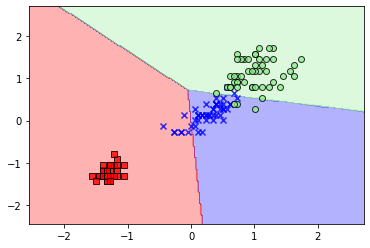

In [13]:
X_combined_std=np.vstack((X_train_std, X_test_std))
y_combined=np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined,
classifier=ppn, test_idx=range(105, 159))
plt.xlabel('comprimento da pétala')
plt.ylabel('largura da pétala')
plt.legend(loc='upper left')
plt.show()

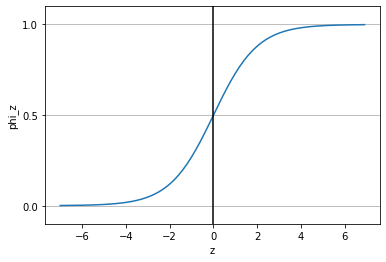

In [15]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))
z=np.arange(-7,7, 0.1)
phi_z=sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('phi_z')
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.show()